<a href="https://colab.research.google.com/github/zolzayakh/Dive-into-coding/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Problem 1] Decision tree in scratch**

In [1]:
import numpy as np
import collections

class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose

    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        self.gain = 0
        for feature_index in range(X.shape[1]):
          self.thresholds = np.unique(X[:,feature_index])
          for threshold in self.thresholds:
            _gain = self._calc_ig(X,feature_index,y,threshold)
            if _gain > self.gain:
                self.l_label = collections.Counter(y[X[:,feature_index] < threshold]).most_common()[0][0]
                self.r_label = collections.Counter(y[X[:,feature_index] >= threshold]).most_common()[0][0]
                self.feature = feature_index
                self.threshold = threshold
                self.gain = _gain
                if self.verbose:
                    print('feature',self.feature,'threshold',self.threshold,'gain',self.gain)

    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        prediction = np.where(X[:,self.feature] < self.threshold,self.l_label,self.r_label)
        return prediction

    def _calc_gini(self, y):
        labels,counts = np.unique(y,return_counts=True)
        _gini = 0
        for label in labels:
          _gini += (counts[labels==label]/np.sum(counts))**2
        gini = 1 - _gini
        return gini

    def _calc_ig(self,X,feature_index,y,threshold):
        labels_l = y[X[:,feature_index] < threshold]
        labels_r = y[X[:,feature_index] >= threshold]
        gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_l)
        gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_r)
        gain = self._calc_gini(y) -gain_l -gain_r
        return gain

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:100,:]
y = iris.target[:100]

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
#transform both X_train and X_test
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [3]:
clf = ScratchDecesionTreeClassifierDepth1(verbose = True)
clf.fit(X_train,y_train)x

feature 0 threshold -1.6720987589963034 gain [0.00697785]
feature 0 threshold -1.5204344724660273 gain [0.02147727]
feature 0 threshold -1.3687701859357508 gain [0.02901316]
feature 0 threshold -1.2171058994054733 gain [0.05285959]
feature 0 threshold -1.065441612875197 gain [0.06987676]
feature 0 threshold -0.9137773263449193 gain [0.09727941]
feature 0 threshold -0.762113039814643 gain [0.11728408]
feature 0 threshold -0.6104487532843668 gain [0.15485221]
feature 0 threshold -0.45878446675408907 gain [0.24796875]
feature 0 threshold -0.15545589369353516 gain [0.28199808]
feature 0 threshold -0.0037916071632588606 gain [0.31880013]
feature 2 threshold -0.84365662096377 gain [0.42875]
feature 2 threshold -0.7056350878817628 gain [0.4743314]
feature 2 threshold 0.05348334406927762 gain [0.49875]


In [4]:
prediction_scratch = clf.predict(X_test)
print (prediction_scratch)

[0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0]


In [11]:
# Decision tree in scratch vs Decision tree of scikit-learn

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#calculate evaluation metrics and add to evaluation_table
def calculate_metrics_add_to_table(prediction_result, model_name, table_name, y_test):
  d = {'accuracy':[accuracy_score(y_test, prediction_result)], 'precision':[precision_score(y_test, prediction_result, average='macro')], 'recall':[recall_score(y_test, prediction_result, average='macro')], 'F1 score': [f1_score(y_test, prediction_result, average='macro')]}
  evaluation_result = pd.DataFrame(data=d, index=[model_name])
  return table_name.append(evaluation_result)

from sklearn import tree
# define models and parameters
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=1).fit(X_train, y_train)
prediction_DT = model.predict(X_test)




print("-----DT of scikit-learn-------")
print("Accuracy:", accuracy_score(prediction_DT, y_test))
print("Prediction:", precision_score(prediction_DT, y_test))
print("Recall:",recall_score(prediction_DT, y_test))
print("F1_score:", f1_score(prediction_DT, y_test))
print("\n-----DT of scratch-------")
print("Accuracy:", accuracy_score(prediction_scratch, y_test))
print("Prediction:", precision_score(prediction_scratch, y_test))
print("Recall:",recall_score(prediction_scratch, y_test))
print("F1_score:", f1_score(prediction_scratch, y_test))


-----DT of scikit-learn-------
Accuracy: 0.85
Prediction: 0.8
Recall: 0.8888888888888888
F1_score: 0.8421052631578948

-----DT of scratch-------
Accuracy: 0.6
Prediction: 0.5
Recall: 0.625
F1_score: 0.5555555555555556


**[Problem 6] Visualization of decision area**

In [8]:
X = iris.data[:100,:2]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
#transform both X_train and X_test
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

clf = ScratchDecesionTreeClassifierDepth1(verbose = True)
clf.fit(X_train,y_train)

feature 0 threshold -1.70094243632072 gain [0.00632911]
feature 0 threshold -1.5473584691585787 gain [0.01948052]
feature 0 threshold -1.3937745019964376 gain [0.02631579]
feature 0 threshold -1.240190534834295 gain [0.04054054]
feature 0 threshold -1.0866065676721537 gain [0.05555556]
feature 0 threshold -0.9330226005100111 gain [0.08823529]
feature 0 threshold -0.7794386333478699 gain [0.09570312]
feature 0 threshold -0.6258546661857287 gain [0.15673981]
feature 0 threshold -0.4722706990235861 gain [0.2399605]
feature 0 threshold -0.31868673186144486 gain [0.25063939]
feature 0 threshold -0.1651027646993023 gain [0.26698413]
feature 0 threshold -0.011518797537161068 gain [0.32]


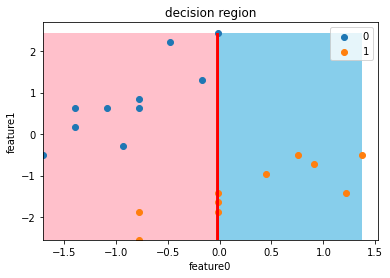

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def decision_region(X,y,slr):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.legend()
    plt.show()

decision_region(X_test, y_test, clf)